In this project I tried to predict the future price of Ethereum with different deep learning architectures. Models in this project are:

0.   Naive Model (baseline)
1.   Dense model with window size 7
2.   Dense model with window size 7 and more layers
3.   Dense model with window size 30
4.   Dense model with window size 7 and Conv1D layers
5.   Dense model with window size 7 and LSTM layers

**horizon** = number of timesteps to predict into future

**window** = number of timesteps from past used to predict horizon

The Ethereum price data has been downloaded from [Investing website](https://www.investing.com/crypto/ethereum/historical-data).

Model #2 is the best model.


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Import with pandas 
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/ETHUSD.csv", 
                 parse_dates=["Date"], 
                 index_col=["Date"]) # parse the date column (tell pandas column 0 is a datetime)
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2016-03-10,11.75,11.2,11.85,11.07,0.00K,4.91%
2016-03-11,11.95,11.75,11.95,11.75,0.18K,1.70%
2016-03-12,12.92,11.95,13.45,11.95,0.83K,8.12%
2016-03-13,15.07,12.92,15.07,12.92,1.30K,16.64%
2016-03-14,12.5,15.07,15.07,11.4,92.18K,-17.05%
...,...,...,...,...,...,...
2023-04-19,"1,935.97","2,103.36","2,104.31","1,925.00",855.36K,-7.96%
2023-04-20,"1,942.72","1,935.97","1,977.95","1,917.71",665.65K,0.35%
2023-04-21,"1,849.81","1,942.72","1,955.35","1,831.47",769.94K,-4.78%


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2601 entries, 2016-03-10 to 2023-04-23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     2601 non-null   object
 1   Open      2601 non-null   object
 2   High      2601 non-null   object
 3   Low       2601 non-null   object
 4   Vol.      2601 non-null   object
 5   Change %  2601 non-null   object
dtypes: object(6)
memory usage: 142.2+ KB


In [4]:
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df.to_csv('ETH.csv') 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2601 entries, 2016-03-10 to 2023-04-23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2601 non-null   float64
 1   Open      2601 non-null   object 
 2   High      2601 non-null   object 
 3   Low       2601 non-null   object 
 4   Vol.      2601 non-null   object 
 5   Change %  2601 non-null   object 
dtypes: float64(1), object(5)
memory usage: 142.2+ KB


In [6]:
# Only want the price for each day 
eth_prices = pd.DataFrame(df["Price"])
eth_prices

,Price
Date,
2016-03-10,11.75
2016-03-11,11.95
2016-03-12,12.92
2016-03-13,15.07
2016-03-14,12.50
...,...
2023-04-19,1935.97
2023-04-20,1942.72
2023-04-21,1849.81


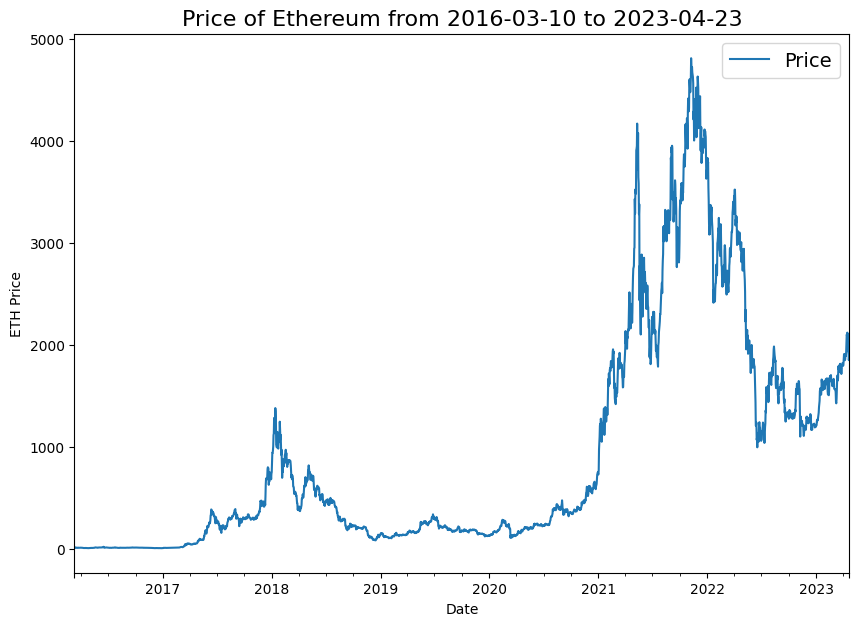

In [7]:
# Plot from Pandas DataFrame
import matplotlib.pyplot as plt
eth_prices.plot(figsize=(10, 7))
plt.ylabel("ETH Price")
plt.title("Price of Ethereum from 2016-03-10 to 2023-04-23", fontsize=16)
plt.legend(fontsize=14);

In [8]:
# Importing and formatting historical Ethereum data with Python
import csv
from datetime import datetime

timesteps = []
eth_price = []
with open("/content/ETH.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    eth_price.append(float(line[1])) # get the price as float

# View first 10 of each
timesteps[:10], eth_price[:10]

([datetime.datetime(2016, 3, 10, 0, 0),
  datetime.datetime(2016, 3, 11, 0, 0),
  datetime.datetime(2016, 3, 12, 0, 0),
  datetime.datetime(2016, 3, 13, 0, 0),
  datetime.datetime(2016, 3, 14, 0, 0),
  datetime.datetime(2016, 3, 15, 0, 0),
  datetime.datetime(2016, 3, 16, 0, 0),
  datetime.datetime(2016, 3, 17, 0, 0),
  datetime.datetime(2016, 3, 18, 0, 0),
  datetime.datetime(2016, 3, 19, 0, 0)],
 [11.75, 11.95, 12.92, 15.07, 12.5, 13.06, 12.88, 10.74, 10.74, 10.31])

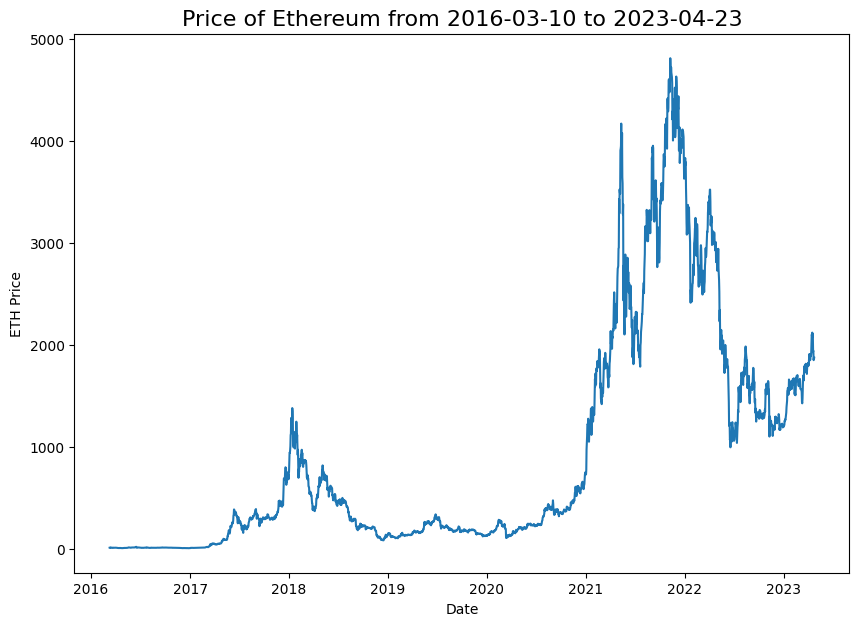

In [9]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, eth_price)
plt.title("Price of Ethereum from 2016-03-10 to 2023-04-23", fontsize=16)
plt.xlabel("Date")
plt.ylabel("ETH Price");

In [10]:
# Get ethereum date array
timesteps = eth_prices.index.to_numpy()
prices = eth_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2016-03-10T00:00:00.000000000', '2016-03-11T00:00:00.000000000',
        '2016-03-12T00:00:00.000000000', '2016-03-13T00:00:00.000000000',
        '2016-03-14T00:00:00.000000000', '2016-03-15T00:00:00.000000000',
        '2016-03-16T00:00:00.000000000', '2016-03-17T00:00:00.000000000',
        '2016-03-18T00:00:00.000000000', '2016-03-19T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([11.75, 11.95, 12.92, 15.07, 12.5 , 13.06, 12.88, 10.74, 10.74,
        10.31]))

In [11]:
# Create train and test splits for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2080, 521, 2080, 521)

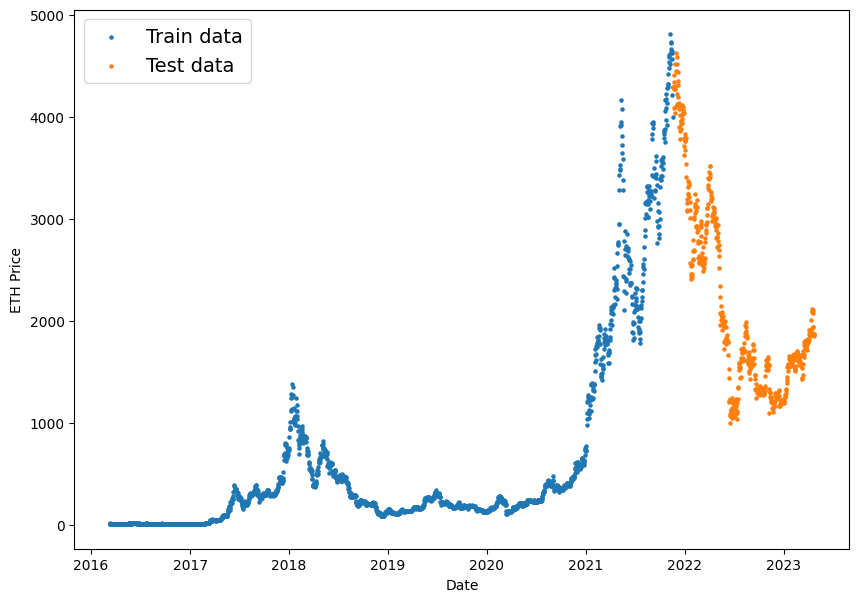

In [12]:
# Plot the splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("ETH Price")
plt.legend(fontsize=14)
plt.show();

In [13]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("ETH Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

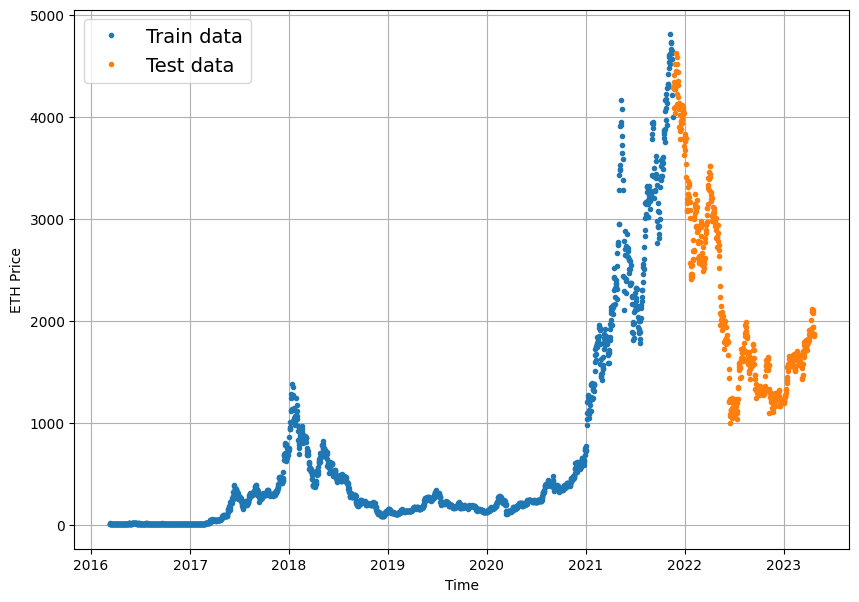

In [14]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [15]:
# Create a naive forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 

(array([4295.43, 4408.85, 4268.08, 4086.95, 4340.23, 4273.54, 4520.3 ,
        4034.53, 4094.8 , 4296.98]),
 array([2012.11, 2099.98, 2090.59, 2119.29, 2074.74, 2103.34, 1935.97,
        1942.72, 1849.81, 1873.95]))

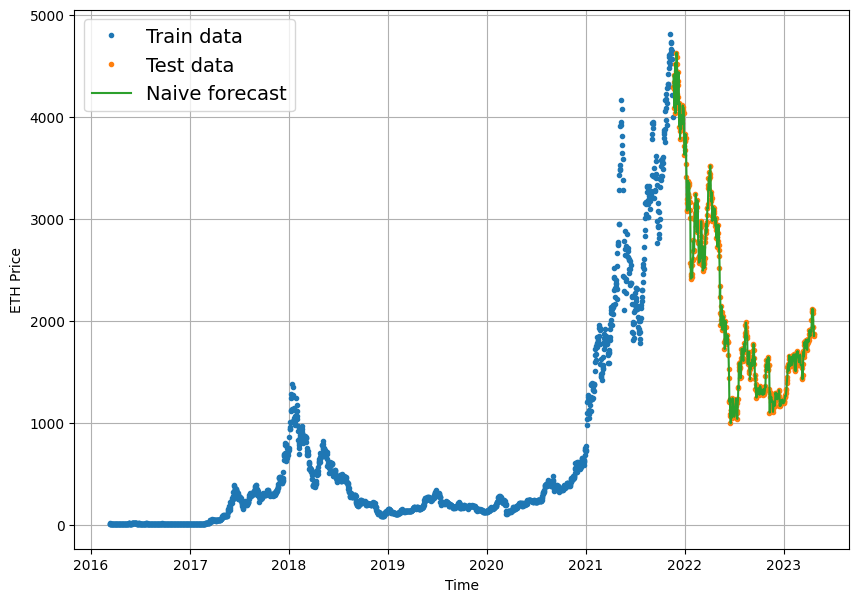

In [16]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

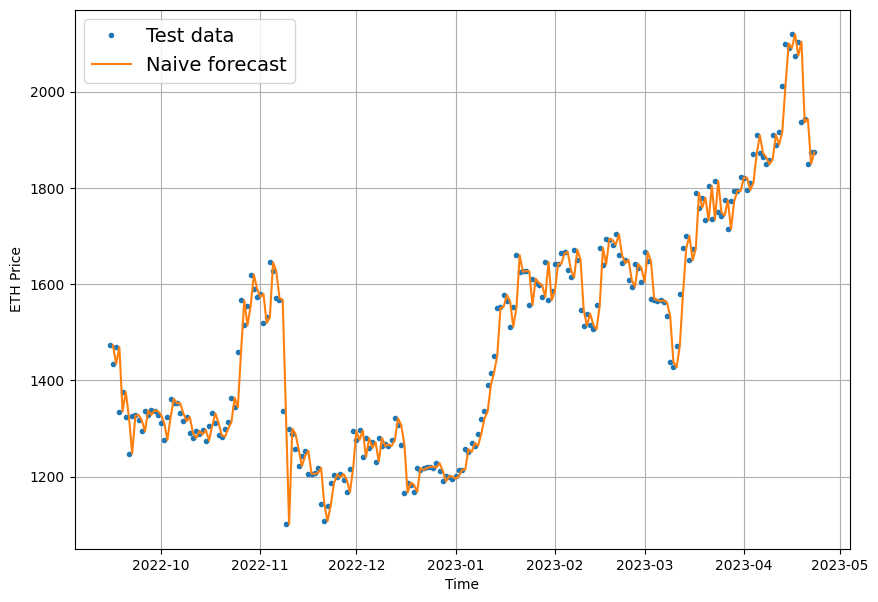

In [17]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [18]:
import tensorflow as tf

In [19]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy()}

In [20]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 63.582386, 'mse': 8492.267, 'rmse': 92.153496, 'mape': 3.0466275}

In [21]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

2090.943358925144

In [22]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [23]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

In [24]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [25]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2594, 2594)

In [26]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [11.75 11.95 12.92 15.07 12.5  13.06 12.88] -> Label: [10.74]
Window: [11.95 12.92 15.07 12.5  13.06 12.88 10.74] -> Label: [10.74]
Window: [12.92 15.07 12.5  13.06 12.88 10.74 10.74] -> Label: [10.31]


In [27]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [2099.98 2090.59 2119.29 2074.74 2103.34 1935.97 1942.72] -> Label: [1849.81]
Window: [2090.59 2119.29 2074.74 2103.34 1935.97 1942.72 1849.81] -> Label: [1873.95]
Window: [2119.29 2074.74 2103.34 1935.97 1942.72 1849.81 1873.95] -> Label: [1873.55]


In [28]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [29]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2075, 519, 2075, 519)

In [30]:
train_windows[:5], train_labels[:5]

(array([[11.75, 11.95, 12.92, 15.07, 12.5 , 13.06, 12.88],
        [11.95, 12.92, 15.07, 12.5 , 13.06, 12.88, 10.74],
        [12.92, 15.07, 12.5 , 13.06, 12.88, 10.74, 10.74],
        [15.07, 12.5 , 13.06, 12.88, 10.74, 10.74, 10.31],
        [12.5 , 13.06, 12.88, 10.74, 10.74, 10.31, 10.18]]),
 array([[10.74],
        [10.74],
        [10.31],
        [10.18],
        [11.95]]))

In [31]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [32]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, 
                                            save_best_only=True) # save only the best model to file

In [33]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") 
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) 

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Ethereum prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
 1/17 [>.............................] - ETA: 12s - loss: 741.4253 - mae: 741.4253

17/17 [==============================] - 2s 66ms/step - loss: 328.3083 - mae: 328.3083 - val_loss: 173.0446 - val_mae: 173.0446
Epoch 2/100
 1/17 [>.............................] - ETA: 0s - loss: 50.3921 - mae: 50.3921

17/17 [==============================] - 1s 37ms/step - loss: 88.3478 - mae: 88.3478 - val_loss: 129.4154 - val_mae: 129.4154
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 50.8993 - mae: 50.8993 - val_loss: 142.1060 - val_mae: 142.1060
Epoch 4/100
 1/17 [>.............................] - ETA: 0s - loss: 59.7737 - mae: 59.7737

17/17 [==============================] - 1s 33ms/step - loss: 42.1090 - mae: 42.1090 - val_loss: 115.6207 - val_mae: 115.6207
Epoch 5/100
 1/17 [>.............................] - ETA: 0s - loss: 40.2322 - mae: 40.2322

17/17 [==============================] - 1s 34ms/step - loss: 38.8723 - mae: 38.8723 - val_loss: 101.7907 - val_mae: 101.7907
Epoch 6/100
 1/17 [>.............................] - ETA: 0s - loss: 38.7783 - mae: 38.7783

17/17 [==============================] - 1s 35ms/step - loss: 36.8185 - mae: 36.8185 - val_loss: 93.7032 - val_mae: 93.7032
Epoch 7/100
 1/17 [>.............................] - ETA: 0s - loss: 35.4348 - mae: 35.4348

17/17 [==============================] - 1s 33ms/step - loss: 35.6286 - mae: 35.6286 - val_loss: 88.0669 - val_mae: 88.0669
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 34.2237 - mae: 34.2237 - val_loss: 93.9844 - val_mae: 93.9844
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 35.3690 - mae: 35.3690 - val_loss: 106.5909 - val_mae: 106.5909
Epoch 10/100
 1/17 [>.............................] - ETA: 0s - loss: 33.3309 - mae: 33.3309

17/17 [==============================] - 1s 34ms/step - loss: 33.5142 - mae: 33.5142 - val_loss: 80.2546 - val_mae: 80.2546
Epoch 11/100
17/17 [==============================] - 0s 4ms/step - loss: 32.6887 - mae: 32.6887 - val_loss: 86.6200 - val_mae: 86.6200
Epoch 12/100
17/17 [==============================] - 0s 4ms/step - loss: 31.9348 - mae: 31.9348 - val_loss: 83.1357 - val_mae: 83.1357
Epoch 13/100
 1/17 [>.............................] - ETA: 0s - loss: 25.5673 - mae: 25.5673

17/17 [==============================] - 1s 51ms/step - loss: 30.4960 - mae: 30.4960 - val_loss: 79.5891 - val_mae: 79.5891
Epoch 14/100
 1/17 [>.............................] - ETA: 0s - loss: 43.0163 - mae: 43.0163

17/17 [==============================] - 1s 50ms/step - loss: 29.8277 - mae: 29.8277 - val_loss: 76.0553 - val_mae: 76.0553
Epoch 15/100
 1/17 [>.............................] - ETA: 0s - loss: 31.4877 - mae: 31.4877

17/17 [==============================] - 1s 52ms/step - loss: 30.0582 - mae: 30.0582 - val_loss: 73.7463 - val_mae: 73.7463
Epoch 16/100
17/17 [==============================] - 0s 6ms/step - loss: 28.9135 - mae: 28.9135 - val_loss: 84.0424 - val_mae: 84.0424
Epoch 17/100
17/17 [==============================] - 0s 6ms/step - loss: 29.2192 - mae: 29.2192 - val_loss: 85.1653 - val_mae: 85.1653
Epoch 18/100
17/17 [==============================] - 0s 5ms/step - loss: 30.3332 - mae: 30.3332 - val_loss: 77.6970 - val_mae: 77.6970
Epoch 19/100
17/17 [==============================] - 0s 5ms/step - loss: 29.5033 - mae: 29.5033 - val_loss: 77.9488 - val_mae: 77.9488
Epoch 20/100
 1/17 [>.............................] - ETA: 0s - loss: 28.4111 - mae: 28.4111

17/17 [==============================] - 1s 50ms/step - loss: 30.5813 - mae: 30.5813 - val_loss: 71.4452 - val_mae: 71.4452
Epoch 21/100
17/17 [==============================] - 0s 6ms/step - loss: 28.7055 - mae: 28.7055 - val_loss: 74.0323 - val_mae: 74.0323
Epoch 22/100
17/17 [==============================] - 0s 5ms/step - loss: 28.8549 - mae: 28.8549 - val_loss: 75.7549 - val_mae: 75.7549
Epoch 23/100
17/17 [==============================] - 0s 6ms/step - loss: 27.7757 - mae: 27.7757 - val_loss: 83.2936 - val_mae: 83.2936
Epoch 24/100
 1/17 [>.............................] - ETA: 0s - loss: 38.1031 - mae: 38.1031

17/17 [==============================] - 1s 37ms/step - loss: 29.4314 - mae: 29.4314 - val_loss: 70.8532 - val_mae: 70.8532
Epoch 25/100
17/17 [==============================] - 0s 4ms/step - loss: 31.6948 - mae: 31.6948 - val_loss: 82.4193 - val_mae: 82.4193
Epoch 26/100
 1/17 [>.............................] - ETA: 0s - loss: 30.7087 - mae: 30.7087

17/17 [==============================] - 1s 34ms/step - loss: 30.5374 - mae: 30.5374 - val_loss: 70.5275 - val_mae: 70.5275
Epoch 27/100
17/17 [==============================] - 0s 4ms/step - loss: 27.4757 - mae: 27.4757 - val_loss: 72.8223 - val_mae: 72.8223
Epoch 28/100
 1/17 [>.............................] - ETA: 0s - loss: 27.1060 - mae: 27.1060

17/17 [==============================] - 1s 35ms/step - loss: 28.2231 - mae: 28.2231 - val_loss: 70.0815 - val_mae: 70.0815
Epoch 29/100
17/17 [==============================] - 0s 4ms/step - loss: 26.7686 - mae: 26.7686 - val_loss: 72.7805 - val_mae: 72.7805
Epoch 30/100
17/17 [==============================] - 0s 4ms/step - loss: 26.7405 - mae: 26.7405 - val_loss: 75.0495 - val_mae: 75.0495
Epoch 31/100
17/17 [==============================] - 0s 4ms/step - loss: 26.7834 - mae: 26.7834 - val_loss: 74.7200 - val_mae: 74.7200
Epoch 32/100
17/17 [==============================] - 0s 4ms/step - loss: 27.7178 - mae: 27.7178 - val_loss: 77.1829 - val_mae: 77.1829
Epoch 33/100
17/17 [==============================] - 0s 4ms/step - loss: 26.8828 - mae: 26.8828 - val_loss: 82.6325 - val_mae: 82.6325
Epoch 34/100
17/17 [==============================] - 0s 4ms/step - loss: 27.3666 - mae: 27.3666 - val_loss: 71.3652 - val_mae: 71.3652
Epoch 35/100
17/17 [==============================] - 0s 4ms

17/17 [==============================] - 1s 35ms/step - loss: 27.2095 - mae: 27.2095 - val_loss: 68.0136 - val_mae: 68.0136
Epoch 37/100
17/17 [==============================] - 0s 5ms/step - loss: 26.5782 - mae: 26.5782 - val_loss: 68.8179 - val_mae: 68.8179
Epoch 38/100
17/17 [==============================] - 0s 4ms/step - loss: 26.1587 - mae: 26.1587 - val_loss: 69.4322 - val_mae: 69.4322
Epoch 39/100
17/17 [==============================] - 0s 5ms/step - loss: 29.3690 - mae: 29.3690 - val_loss: 78.0693 - val_mae: 78.0693
Epoch 40/100
17/17 [==============================] - 0s 4ms/step - loss: 26.7045 - mae: 26.7045 - val_loss: 71.5024 - val_mae: 71.5024
Epoch 41/100
17/17 [==============================] - 0s 4ms/step - loss: 26.0594 - mae: 26.0594 - val_loss: 69.9041 - val_mae: 69.9041
Epoch 42/100
17/17 [==============================] - 0s 4ms/step - loss: 25.9118 - mae: 25.9118 - val_loss: 68.6501 - val_mae: 68.6501
Epoch 43/100
17/17 [==============================] - 0s 5ms

17/17 [==============================] - 1s 51ms/step - loss: 27.1196 - mae: 27.1196 - val_loss: 67.0432 - val_mae: 67.0432
Epoch 46/100
17/17 [==============================] - 0s 4ms/step - loss: 26.3946 - mae: 26.3946 - val_loss: 67.9898 - val_mae: 67.9898
Epoch 47/100
17/17 [==============================] - 0s 5ms/step - loss: 26.6228 - mae: 26.6228 - val_loss: 74.2814 - val_mae: 74.2814
Epoch 48/100
17/17 [==============================] - 0s 4ms/step - loss: 26.9365 - mae: 26.9365 - val_loss: 68.5306 - val_mae: 68.5306
Epoch 49/100
17/17 [==============================] - 0s 4ms/step - loss: 26.2435 - mae: 26.2435 - val_loss: 69.7204 - val_mae: 69.7204
Epoch 50/100
17/17 [==============================] - 0s 4ms/step - loss: 25.5010 - mae: 25.5010 - val_loss: 67.2218 - val_mae: 67.2218
Epoch 51/100
17/17 [==============================] - 0s 4ms/step - loss: 26.0048 - mae: 26.0048 - val_loss: 74.8193 - val_mae: 74.8193
Epoch 52/100
 1/17 [>.............................] - ETA: 0

17/17 [==============================] - 1s 34ms/step - loss: 25.8816 - mae: 25.8816 - val_loss: 66.5378 - val_mae: 66.5378
Epoch 53/100
17/17 [==============================] - 0s 5ms/step - loss: 26.2199 - mae: 26.2199 - val_loss: 69.3641 - val_mae: 69.3641
Epoch 54/100
17/17 [==============================] - 0s 4ms/step - loss: 27.1967 - mae: 27.1967 - val_loss: 89.3262 - val_mae: 89.3262
Epoch 55/100
17/17 [==============================] - 0s 4ms/step - loss: 27.2022 - mae: 27.2022 - val_loss: 69.5325 - val_mae: 69.5325
Epoch 56/100
17/17 [==============================] - 0s 4ms/step - loss: 26.4865 - mae: 26.4865 - val_loss: 66.9454 - val_mae: 66.9454
Epoch 57/100
17/17 [==============================] - 0s 4ms/step - loss: 26.3769 - mae: 26.3769 - val_loss: 81.0619 - val_mae: 81.0619
Epoch 58/100
17/17 [==============================] - 0s 4ms/step - loss: 28.1481 - mae: 28.1481 - val_loss: 74.4665 - val_mae: 74.4665
Epoch 59/100
17/17 [==============================] - 0s 4ms

17/17 [==============================] - 1s 33ms/step - loss: 26.2995 - mae: 26.2995 - val_loss: 66.2433 - val_mae: 66.2433
Epoch 61/100
17/17 [==============================] - 0s 4ms/step - loss: 25.9997 - mae: 25.9997 - val_loss: 71.3236 - val_mae: 71.3236
Epoch 62/100
17/17 [==============================] - 0s 5ms/step - loss: 26.1950 - mae: 26.1950 - val_loss: 83.3854 - val_mae: 83.3854
Epoch 63/100
17/17 [==============================] - 0s 3ms/step - loss: 27.6491 - mae: 27.6491 - val_loss: 66.4055 - val_mae: 66.4055
Epoch 64/100
17/17 [==============================] - 0s 5ms/step - loss: 26.0359 - mae: 26.0359 - val_loss: 66.5460 - val_mae: 66.5460
Epoch 65/100
17/17 [==============================] - 0s 4ms/step - loss: 26.4335 - mae: 26.4335 - val_loss: 71.9659 - val_mae: 71.9659
Epoch 66/100
17/17 [==============================] - 0s 4ms/step - loss: 25.9284 - mae: 25.9284 - val_loss: 66.5376 - val_mae: 66.5376
Epoch 67/100
17/17 [==============================] - 0s 4ms

17/17 [==============================] - 1s 35ms/step - loss: 27.3850 - mae: 27.3850 - val_loss: 65.8617 - val_mae: 65.8617
Epoch 69/100
17/17 [==============================] - 0s 5ms/step - loss: 26.3765 - mae: 26.3765 - val_loss: 67.9514 - val_mae: 67.9514
Epoch 70/100
17/17 [==============================] - 0s 4ms/step - loss: 25.7542 - mae: 25.7542 - val_loss: 75.5048 - val_mae: 75.5048
Epoch 71/100
17/17 [==============================] - 0s 4ms/step - loss: 25.6286 - mae: 25.6286 - val_loss: 68.9549 - val_mae: 68.9549
Epoch 72/100
17/17 [==============================] - 0s 4ms/step - loss: 25.5184 - mae: 25.5184 - val_loss: 66.1429 - val_mae: 66.1429
Epoch 73/100
17/17 [==============================] - 0s 4ms/step - loss: 25.1861 - mae: 25.1861 - val_loss: 68.4324 - val_mae: 68.4324
Epoch 74/100
17/17 [==============================] - 0s 4ms/step - loss: 25.7706 - mae: 25.7706 - val_loss: 80.7955 - val_mae: 80.7955
Epoch 75/100
17/17 [==============================] - 0s 4ms

17/17 [==============================] - 1s 34ms/step - loss: 27.9163 - mae: 27.9163 - val_loss: 65.6213 - val_mae: 65.6213
Epoch 77/100
 1/17 [>.............................] - ETA: 0s - loss: 22.4680 - mae: 22.4680

17/17 [==============================] - 1s 35ms/step - loss: 25.2899 - mae: 25.2899 - val_loss: 65.4255 - val_mae: 65.4255
Epoch 78/100
17/17 [==============================] - 0s 4ms/step - loss: 26.3791 - mae: 26.3791 - val_loss: 100.8732 - val_mae: 100.8732
Epoch 79/100
17/17 [==============================] - 0s 4ms/step - loss: 27.6010 - mae: 27.6010 - val_loss: 74.5907 - val_mae: 74.5907
Epoch 80/100
 1/17 [>.............................] - ETA: 0s - loss: 30.5276 - mae: 30.5276

17/17 [==============================] - 1s 34ms/step - loss: 26.7245 - mae: 26.7245 - val_loss: 65.3391 - val_mae: 65.3391
Epoch 81/100
17/17 [==============================] - 0s 4ms/step - loss: 25.3156 - mae: 25.3156 - val_loss: 68.1014 - val_mae: 68.1014
Epoch 82/100
17/17 [==============================] - 0s 4ms/step - loss: 25.4197 - mae: 25.4197 - val_loss: 67.4299 - val_mae: 67.4299
Epoch 83/100
 1/17 [>.............................] - ETA: 0s - loss: 25.1724 - mae: 25.1724

17/17 [==============================] - 1s 50ms/step - loss: 25.4559 - mae: 25.4559 - val_loss: 65.2816 - val_mae: 65.2816
Epoch 84/100
 1/17 [>.............................] - ETA: 0s - loss: 23.5740 - mae: 23.5740

17/17 [==============================] - 1s 50ms/step - loss: 25.7582 - mae: 25.7582 - val_loss: 65.2507 - val_mae: 65.2507
Epoch 85/100
17/17 [==============================] - 0s 5ms/step - loss: 26.3118 - mae: 26.3118 - val_loss: 67.1782 - val_mae: 67.1782
Epoch 86/100
17/17 [==============================] - 0s 5ms/step - loss: 25.7080 - mae: 25.7080 - val_loss: 65.3355 - val_mae: 65.3355
Epoch 87/100
17/17 [==============================] - 0s 5ms/step - loss: 25.3097 - mae: 25.3097 - val_loss: 68.7120 - val_mae: 68.7120
Epoch 88/100
17/17 [==============================] - 0s 6ms/step - loss: 25.2094 - mae: 25.2094 - val_loss: 65.6295 - val_mae: 65.6295
Epoch 89/100
17/17 [==============================] - 0s 5ms/step - loss: 26.3580 - mae: 26.3580 - val_loss: 82.6364 - val_mae: 82.6364
Epoch 90/100
17/17 [==============================] - 0s 5ms/step - loss: 26.9362 - mae: 26.9362 - val_loss: 69.4530 - val_mae: 69.4530
Epoch 91/100
17/17 [==============================] - 0s 5ms

17/17 [==============================] - 1s 52ms/step - loss: 25.7987 - mae: 25.7987 - val_loss: 65.2180 - val_mae: 65.2180
Epoch 96/100
17/17 [==============================] - 0s 6ms/step - loss: 25.5190 - mae: 25.5190 - val_loss: 92.8894 - val_mae: 92.8894
Epoch 97/100
17/17 [==============================] - 0s 6ms/step - loss: 26.4960 - mae: 26.4960 - val_loss: 65.4204 - val_mae: 65.4204
Epoch 98/100
17/17 [==============================] - 0s 6ms/step - loss: 25.8614 - mae: 25.8614 - val_loss: 65.4813 - val_mae: 65.4813
Epoch 99/100
 1/17 [>.............................] - ETA: 0s - loss: 24.4437 - mae: 24.4437

17/17 [==============================] - 1s 45ms/step - loss: 25.3965 - mae: 25.3965 - val_loss: 64.8328 - val_mae: 64.8328
Epoch 100/100
17/17 [==============================] - 0s 4ms/step - loss: 25.8805 - mae: 25.8805 - val_loss: 80.6543 - val_mae: 80.6543


In [34]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 80.6543 - mae: 80.6543


[80.654296875, 80.654296875]

In [35]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 64.8328 - mae: 64.8328


[64.83277893066406, 64.83277893066406]

In [36]:
def make_preds(model, input_data):

  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [37]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

17/17 [==============================] - 0s 2ms/step


(519,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([4411.138 , 4268.548 , 4130.6533, 4264.21  , 4320.9165, 4457.202 ,
        4161.092 , 4026.9695, 4292.067 , 4401.042 ], dtype=float32)>)

In [38]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results
     

{'mae': 64.83279, 'mse': 8907.729, 'rmse': 94.38076, 'mape': 3.1255445}

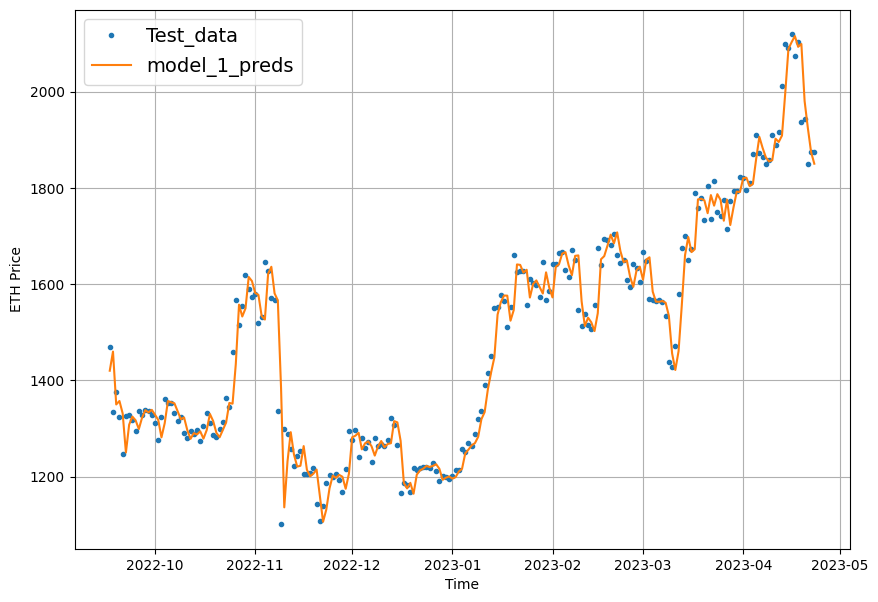

In [39]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

In [40]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 7 # use 7 timesteps in the past

In [41]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2594, 2594)

In [42]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2075, 519, 2075, 519)

In [75]:
tf.random.set_seed(42)

# Create model (same model as model 1 but layers will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [76]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 63.5693


63.56932830810547

In [77]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 63.5693


63.56932830810547

In [78]:
# Get forecast predictions
model_2_preds = make_preds(model_2, input_data=test_windows)

17/17 [==============================] - 0s 2ms/step


In [79]:
# Evaluate results for model 1d predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 63.569336, 'mse': 8586.467, 'rmse': 92.66319, 'mape': 3.067008}

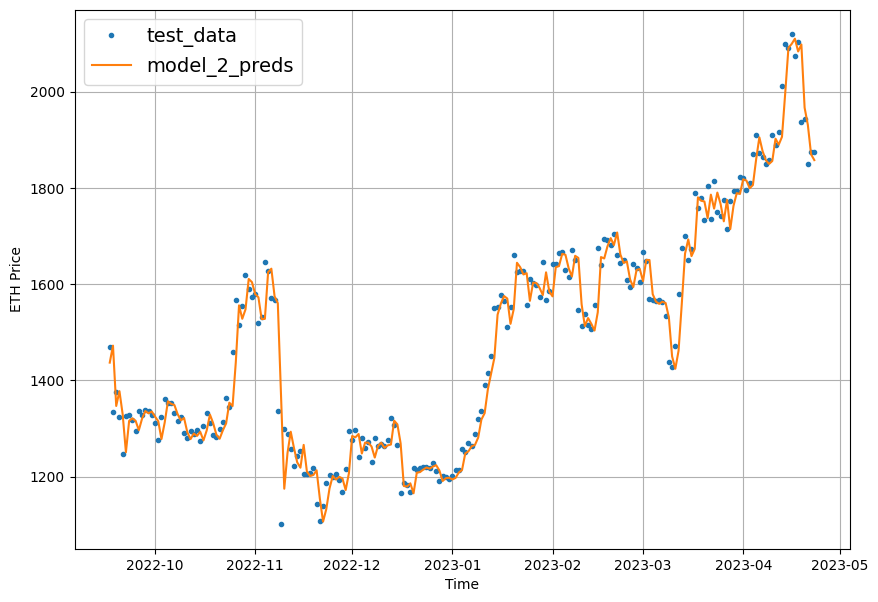

In [80]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds") 

In [49]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [50]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2571, 2571)

In [51]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2056, 515, 2056, 515)

In [52]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [53]:
# Evaluate model 3 preds
model_3.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 1ms/step - loss: 73.1908


73.19078063964844

In [54]:
# Load in best performing model
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 71.6725


71.67247772216797

In [55]:
# Get forecast predictions
model_3_preds = make_preds(model_3, input_data=test_windows)

17/17 [==============================] - 0s 1ms/step


In [56]:
# Evaluate results for model 2 predictions
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_3_preds)
model_3_results

{'mae': 71.67249, 'mse': 10806.513, 'rmse': 103.95438, 'mape': 3.5119123}

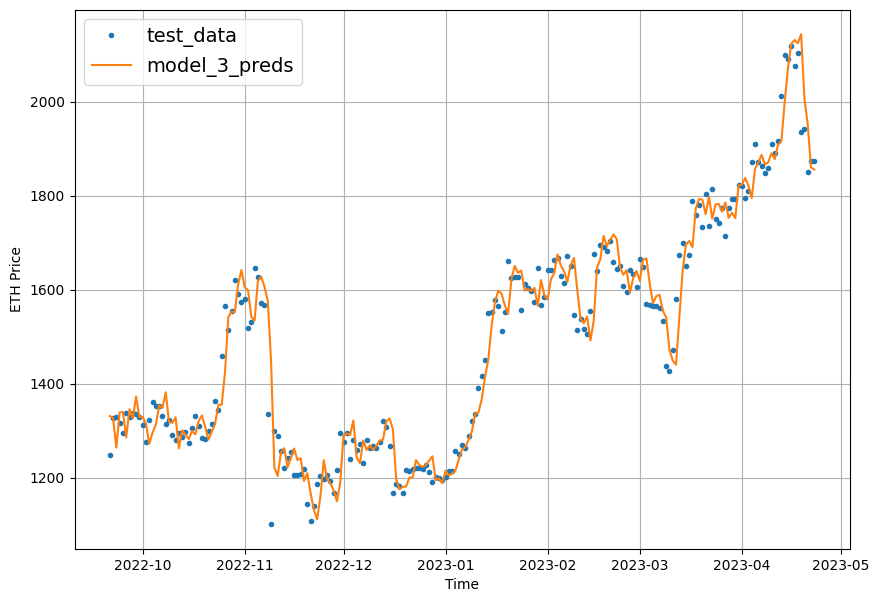

In [57]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, format="-", label="model_3_preds") 

In [58]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [59]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2594, 2594)

In [60]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2075, 519, 2075, 519)

In [61]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [62]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[11.75]
 [11.95]
 [12.92]
 [15.07]
 [12.5 ]
 [13.06]
 [12.88]]


In [63]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [64]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_8 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 64.4084


64.408447265625

In [66]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

17/17 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([4357.9277, 4285.9824, 4147.578 , 4257.1826, 4296.3403, 4473.4414,
       4146.4453, 4077.4038, 4243.0527, 4392.808 ], dtype=float32)>

In [67]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 64.408455, 'mse': 8899.215, 'rmse': 94.33565, 'mape': 3.1113977}

In [68]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
x = layers.LSTM(128, activation="relu")(x) 
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())


model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [69]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 65.4895


65.48947143554688

In [70]:

# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

17/17 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([4362.9546, 4283.051 , 4185.489 , 4277.7915, 4297.977 , 4475.5605,
       4174.5654, 4104.742 , 4265.1763, 4372.541 ], dtype=float32)>

In [71]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 65.48948, 'mse': 9232.273, 'rmse': 96.08472, 'mape': 3.1708355}

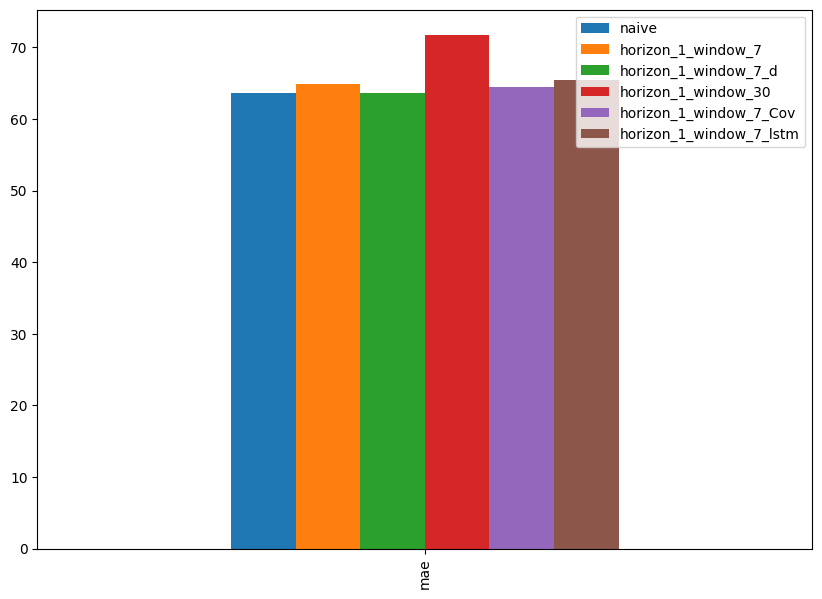

In [81]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_7_d": model_2_results["mae"], 
              "horizon_1_window_30": model_3_results["mae"],
              "horizon_1_window_7_Cov": model_4_results["mae"], 
              "horizon_1_window_7_lstm": model_5_results["mae"],
              }, index=["mae"]).plot(figsize=(10, 7), kind="bar");

In [82]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w7_h1_d": model_2_results,
                              "model_3_dense_w30_h1": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results}).T
model_results

,mae,mse,rmse,mape
naive_model,63.582386,8492.266602,92.153496,3.046628
model_1_dense_w7_h1,64.832787,8907.728516,94.380760,3.125545
model_2_dense_w7_h1_d,63.569336,8586.466797,92.663193,3.067008
model_3_dense_w30_h1,71.672493,10806.512695,103.954376,3.511912
model_4_CONV1D,64.408455,8899.214844,94.335648,3.111398
model_5_LSTM,65.489479,9232.273438,96.084717,3.170835
